# K Means Clustering with Python
The k-means clustering method is an unsupervised machine learning technique used to identify clusters of data objects in a dataset. There are many different types of clustering methods, but k-means is one of the oldest and most approachable. These traits make implementing k-means clustering in Python reasonably straightforward, even for novice programmers and data scientists.

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Make a fake dataset with Scikit-learn:

In [2]:
from sklearn.datasets import make_blobs # Make a fake dataset

In [3]:
data = make_blobs(n_samples= 400 , n_features= 2, centers= 5 , cluster_std= 2.2 , random_state= 101)

In [4]:
data

(array([[ 7.02698306e+00,  7.06224031e+00],
        [-1.06656690e+00,  4.84998307e+00],
        [ 1.87364187e-01,  2.12649727e+00],
        [ 3.86288825e+00, -1.04121019e+00],
        [ 2.78824337e+00, -9.01915582e+00],
        [ 2.27484299e-01,  1.44067792e+00],
        [-4.96551826e+00, -8.87155532e+00],
        [ 1.49136224e+00,  1.17550564e-01],
        [-4.52738773e+00,  5.91247168e+00],
        [-4.49717603e+00,  7.51438977e+00],
        [-8.53382528e+00, -4.79231284e+00],
        [ 2.84289074e+00,  6.13322639e+00],
        [-3.00329030e+00,  8.58021368e+00],
        [ 3.39216411e+00, -5.36833379e+00],
        [-1.18228744e+01, -1.22186541e+01],
        [ 5.60555977e+00,  5.07910781e+00],
        [-5.38498028e+00,  7.80459659e+00],
        [ 6.80635421e-01,  4.20632060e+00],
        [-9.83070359e+00, -7.89668490e+00],
        [ 5.47837543e+00,  6.59717137e+00],
        [ 1.82663300e+00,  3.69062690e+00],
        [-1.08142574e+00,  9.05358419e+00],
        [ 6.87049813e+00, -6.727

In [5]:
data[1] # label column --> this is not important for us in this step

array([2, 3, 2, 0, 4, 0, 1, 0, 3, 3, 1, 2, 3, 4, 1, 2, 3, 2, 1, 2, 0, 3,
       4, 3, 4, 1, 0, 1, 4, 3, 2, 0, 3, 0, 4, 0, 4, 4, 0, 1, 2, 2, 3, 1,
       3, 1, 4, 2, 1, 1, 2, 0, 2, 0, 4, 4, 1, 1, 1, 4, 3, 0, 0, 0, 2, 3,
       2, 2, 1, 2, 0, 0, 1, 2, 3, 3, 0, 2, 1, 1, 4, 2, 0, 2, 3, 3, 2, 0,
       2, 3, 4, 1, 4, 1, 1, 4, 4, 4, 2, 3, 4, 2, 1, 2, 0, 3, 2, 0, 0, 4,
       2, 3, 1, 3, 1, 4, 4, 2, 4, 4, 0, 3, 4, 3, 3, 2, 0, 4, 3, 0, 2, 0,
       2, 3, 0, 1, 1, 2, 2, 4, 1, 4, 0, 0, 3, 2, 0, 1, 2, 1, 4, 2, 3, 3,
       1, 0, 3, 0, 1, 4, 1, 1, 4, 1, 0, 4, 2, 4, 0, 0, 2, 4, 4, 3, 1, 2,
       0, 0, 0, 4, 3, 2, 1, 0, 2, 0, 0, 0, 3, 1, 4, 2, 0, 0, 1, 1, 4, 4,
       2, 3, 4, 0, 3, 2, 2, 4, 3, 1, 3, 0, 3, 2, 3, 2, 4, 3, 1, 1, 1, 2,
       0, 4, 1, 3, 2, 3, 3, 2, 1, 1, 0, 2, 2, 0, 1, 2, 3, 1, 3, 2, 3, 3,
       1, 4, 0, 4, 2, 1, 3, 3, 3, 1, 4, 1, 1, 4, 1, 3, 1, 2, 3, 1, 4, 0,
       0, 1, 4, 3, 4, 3, 1, 3, 1, 2, 3, 1, 3, 4, 4, 0, 4, 3, 4, 2, 4, 0,
       2, 0, 4, 0, 3, 2, 0, 3, 3, 0, 2, 4, 4, 1, 4,

In [6]:
df_dict = {'Feature 1' : data[0][:,0] , 'Feature 2' : data[0][:,1] } # make a dict with data samples and optional features name 

In [7]:
df_dict

{'Feature 1': array([ 7.02698306e+00, -1.06656690e+00,  1.87364187e-01,  3.86288825e+00,
         2.78824337e+00,  2.27484299e-01, -4.96551826e+00,  1.49136224e+00,
        -4.52738773e+00, -4.49717603e+00, -8.53382528e+00,  2.84289074e+00,
        -3.00329030e+00,  3.39216411e+00, -1.18228744e+01,  5.60555977e+00,
        -5.38498028e+00,  6.80635421e-01, -9.83070359e+00,  5.47837543e+00,
         1.82663300e+00, -1.08142574e+00,  6.87049813e+00, -2.47900722e+00,
         5.49654741e+00, -1.14734405e+01, -4.11199758e+00, -9.31246026e+00,
         6.55958230e+00, -3.59542056e-01,  4.90268996e+00,  8.49362941e-01,
        -8.59048021e+00, -1.44226077e+00,  3.23881813e+00,  1.93182476e+00,
         6.09880132e+00,  5.88176680e+00, -4.01175867e+00, -1.00580804e+01,
         2.89884100e+00,  9.42826784e+00, -3.28706306e+00, -7.44429858e+00,
        -2.58232092e+00, -8.70261111e+00,  4.20674259e+00,  8.86634988e-01,
        -1.07073580e+01, -1.24918574e+01,  3.77943847e+00,  1.61903660e+00,

In [8]:
df = pd.DataFrame.from_dict(df_dict)

In [9]:
df # we made a dataframe 

,Feature 1,Feature 2
0,7.026983,7.062240
1,-1.066567,4.849983
2,0.187364,2.126497
3,3.862888,-1.041210
4,2.788243,-9.019156
...,...,...
395,3.104646,-4.646825
396,4.787467,-7.314895
397,3.735282,1.933664
398,6.061101,2.917071


In [10]:
df.to_csv('kmeans_fake_df.csv' , index= False)

# K Means Clustering
### Data Understanding

In [11]:
df = pd.read_csv('kmeans_fake_df.csv')

In [12]:
df

,Feature 1,Feature 2
0,7.026983,7.062240
1,-1.066567,4.849983
2,0.187364,2.126497
3,3.862888,-1.041210
4,2.788243,-9.019156
...,...,...
395,3.104646,-4.646825
396,4.787467,-7.314895
397,3.735282,1.933664
398,6.061101,2.917071


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  400 non-null    float64
 1   Feature 2  400 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB


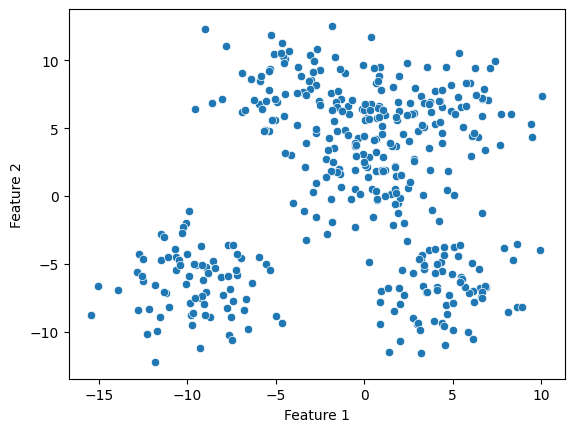

In [14]:
sns.scatterplot(data = df , x='Feature 1' , y= 'Feature 2' );

## Unsupervised Learning

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(n_clusters=5 ,n_init='auto') # Model instanciate

In [17]:
kmeans.fit(df)

KMeans(n_clusters=5, n_init='auto')

In [18]:
kmeans.labels_ # the Model made Label for each sapmle(row)

array([3, 4, 4, 4, 0, 4, 2, 4, 1, 1, 2, 3, 1, 0, 2, 3, 1, 4, 2, 3, 4, 1,
       0, 1, 0, 2, 4, 2, 0, 4, 3, 4, 1, 4, 0, 4, 0, 0, 4, 2, 3, 3, 1, 2,
       1, 2, 0, 3, 2, 2, 3, 4, 4, 4, 0, 0, 2, 2, 2, 0, 4, 3, 4, 4, 3, 1,
       3, 3, 2, 3, 4, 4, 2, 3, 3, 1, 3, 3, 2, 2, 0, 3, 4, 3, 1, 1, 3, 4,
       4, 1, 0, 2, 0, 2, 2, 0, 0, 0, 3, 1, 0, 3, 2, 3, 4, 1, 3, 4, 3, 0,
       3, 1, 2, 3, 2, 0, 0, 3, 0, 0, 4, 4, 0, 1, 1, 3, 4, 0, 1, 4, 3, 3,
       3, 1, 4, 2, 2, 3, 3, 0, 2, 0, 4, 4, 1, 3, 4, 2, 3, 2, 0, 3, 3, 1,
       2, 4, 1, 1, 2, 0, 2, 2, 0, 2, 4, 0, 3, 0, 1, 4, 3, 0, 0, 1, 2, 3,
       4, 4, 4, 0, 1, 3, 4, 0, 3, 4, 4, 4, 1, 2, 0, 3, 4, 4, 2, 2, 0, 0,
       3, 1, 4, 4, 1, 3, 3, 0, 1, 2, 1, 4, 1, 3, 3, 3, 0, 1, 2, 2, 2, 3,
       4, 0, 2, 1, 4, 1, 1, 3, 2, 2, 4, 3, 3, 4, 2, 3, 1, 2, 4, 3, 1, 1,
       2, 0, 3, 0, 1, 2, 1, 1, 1, 2, 0, 2, 2, 0, 2, 1, 2, 4, 1, 2, 0, 4,
       4, 2, 0, 1, 0, 1, 2, 1, 2, 3, 1, 2, 1, 0, 0, 3, 0, 3, 0, 3, 0, 4,
       3, 4, 0, 4, 1, 4, 4, 1, 1, 4, 3, 0, 0, 2, 0,

In [19]:
kmeans.cluster_centers_ # our centroids k1, k2 , ...

array([[ 4.53430563, -6.69739781],
       [-3.99041524,  7.93221083],
       [-9.53622416, -6.46722025],
       [ 3.77965674,  6.61102664],
       [ 0.21202449,  1.49153248]])

In [20]:
df_k = df

In [21]:
df['Label(k=5)'] = kmeans.labels_ # adding label as a feature to the Dataframe

In [22]:
df

,Feature 1,Feature 2,Label(k=5)
0,7.026983,7.062240,3
1,-1.066567,4.849983,4
2,0.187364,2.126497,4
3,3.862888,-1.041210,4
4,2.788243,-9.019156,0
...,...,...,...
395,3.104646,-4.646825,0
396,4.787467,-7.314895,0
397,3.735282,1.933664,4
398,6.061101,2.917071,3


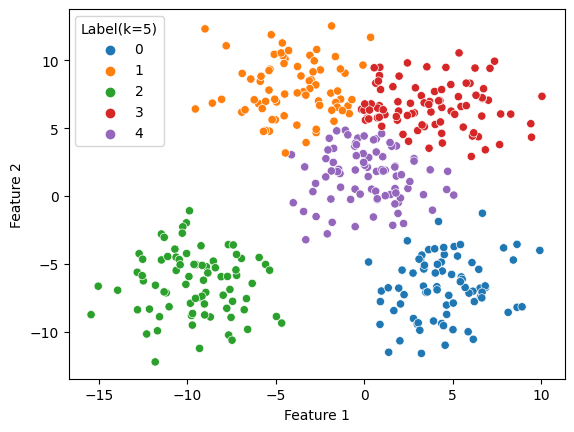

In [23]:
sns.scatterplot(data= df_k , x='Feature 1' , y= 'Feature 2' , hue = 'Label(k=5)' , palette= 'tab10');

In [24]:
#df.drop('Label(k=2)', axis=1 , inplace= True)

In [25]:
df

,Feature 1,Feature 2,Label(k=5)
0,7.026983,7.062240,3
1,-1.066567,4.849983,4
2,0.187364,2.126497,4
3,3.862888,-1.041210,4
4,2.788243,-9.019156,0
...,...,...,...
395,3.104646,-4.646825,0
396,4.787467,-7.314895,0
397,3.735282,1.933664,4
398,6.061101,2.917071,3


In [26]:
kmeans_b = KMeans(n_clusters=3 , n_init='auto')

In [27]:
kmeans_b.fit(df)

KMeans(n_clusters=3, n_init='auto')

In [28]:
df['Label(k=3)'] = kmeans_b.labels_

In [29]:
df

,Feature 1,Feature 2,Label(k=5),Label(k=3)
0,7.026983,7.062240,3,0
1,-1.066567,4.849983,4,0
2,0.187364,2.126497,4,0
3,3.862888,-1.041210,4,1
4,2.788243,-9.019156,0,1
...,...,...,...,...
395,3.104646,-4.646825,0,1
396,4.787467,-7.314895,0,1
397,3.735282,1.933664,4,0
398,6.061101,2.917071,3,0


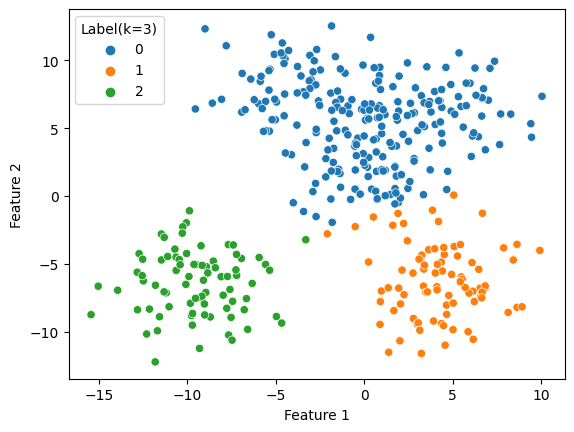

In [30]:
sns.scatterplot(data= df , x='Feature 1' , y= 'Feature 2' , hue = 'Label(k=3)' , palette= 'tab10');

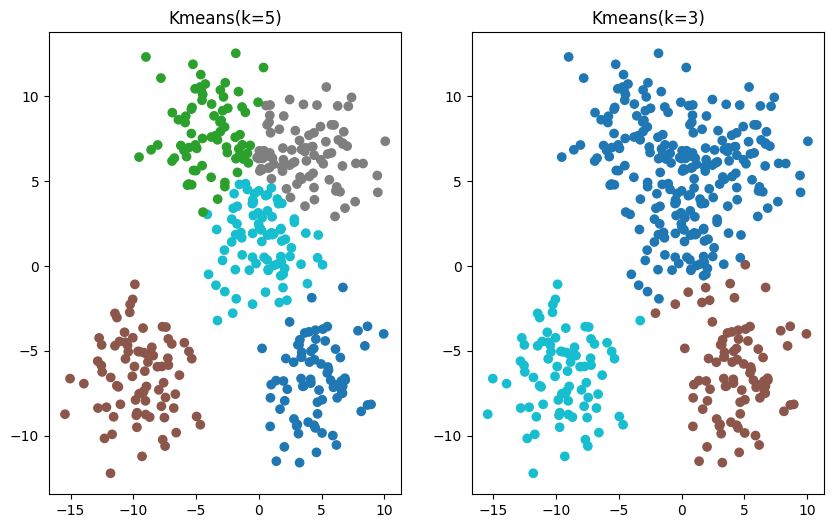

In [31]:
f , (ax1,ax2) = plt.subplots(1 , 2 ,figsize= (10,6))
ax1.set_title ('Kmeans(k=5)')
ax1.scatter(x= df['Feature 1'], y= df['Feature 2'], c= df['Label(k=5)'], cmap='tab10')
ax2.set_title('Kmeans(k=3)')
ax2.scatter(x= df['Feature 1'], y= df['Feature 2'], c= df['Label(k=3)'] , cmap='tab10'); 

## Elbow Method
In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use. The same method can be used to choose the number of parameters in other data-driven models, such as the number of principal components to describe a data set. 

In [32]:
k = 1

In [33]:
kmeans = KMeans(n_clusters= k ,n_init= 'auto')

In [34]:
kmeans.fit(df)

KMeans(n_clusters=1, n_init='auto')

In [35]:
kmeans.inertia_ # inertia == SSE --> Inertia: Sum of distances of samples to their closest cluster center

30731.570705612965

### SSE (Sum of the Squared Euclidean distances of each point)

The quality of the cluster assignments is determined by computing the sum of the squared error (SSE) after the centroids converge, or match the previous iteration’s assignment. The SSE is defined as the sum of the squared Euclidean distances of each point to its closest centroid. Since this is a measure of error, the objective of k-means is to try to minimize this value.

## $$SSE = \sum_{i=1}^n(x_i-\ {c}_j)^2$$

In [36]:
sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters= k ,n_init= 'auto')
    kmeans.fit(df)
    sse[k] = kmeans.inertia_

In [37]:
sse  # Optimom 'K' is k with minimum SSE and Minimum k because big 'k' is equal hard process.

{1: 30731.570705612965,
 2: 15960.957322265702,
 3: 8176.3057725718045,
 4: 5309.311084578489,
 5: 3657.4932638024325,
 6: 3219.511861492118,
 7: 2931.1562498720905,
 8: 2700.1186605278676,
 9: 2429.939416805419}

Text(0, 0.5, 'SSE (inertia)')

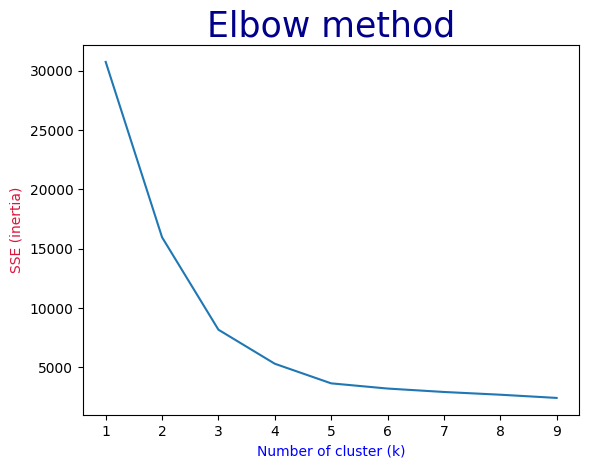

In [48]:
plt.plot(list(sse.keys()) , list(sse.values()))
plt.title('Elbow method' , color = 'darkblue',fontsize = 25)
plt.xlabel("Number of cluster (k)" ,color= 'blue')
plt.ylabel('SSE (inertia)',color= 'crimson')             

**Elbow poit  = 5 (optimum point)**

*Written by Kasra Tehrani*  
*https://www.linkedin.com/in/kasra-naderi-tehrani-a298b521b/* - 
*https://github.com/kasra-python* - 
*kasra.n.tehrani@gmail.com* 

*Good luck!*